

# Project: Investigate the TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project investigated the TMDB 5000 Movie Dataset from Kaggle. The purpose of this project is to investigate three questions: 1. Which genres are most popular from year to year 2. Top 20 most active actors and actresses 3. What kinds of properties (for example budget, popularity and runtime) are associated with movies that have high revenues. The data analysis process will be followed in order to complete the project. 

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

movie_df = pd.read_csv('C:\\Users\\Sally\\Anaconda3\\Data-Analyst-P1\\tmdb-movies.csv')



Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

First of all, I loaded csv file into my jupyter notebook. I printed out the first five rows to check if the data types are correct.Then I used the describe function to genreate the descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution. 

### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df.head()




,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


As we can see from above, the data types are fine, but columns such as casts and genres need to be split. Since I want to investigate casts and genres, I wrote a function to split the single row of them into multiple rows. 

In [6]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning 


In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movie_df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

From the table above, we can see that columns such as homepage, tagline, keywords and production companies contain many null values. So I will remove them from the dataset since I don't need to investigate them. 

In [8]:
movie_df_dropped = movie_df.drop(['homepage','tagline','keywords','production_companies'], axis=1)


In [9]:
movie_modified = movie_df_dropped.dropna()
movie_modified

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


From the table above, I dropped rows that contain NaN values. As a result, the dataset does not contain any missing values. 

In [10]:
movie_modified = movie_modified.drop_duplicates(['original_title'])
movie_modified

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


I noticed that the column 'original_title' contains duplicates, which is not useful for my analysis. I applied drop duplicates function to drop the redundant movie titles. 

<a id='eda'></a>
## Exploratory Data Analysis


### which genres are most popular  from year to year?

In [19]:
def append (sets):
    splitted_sets = []
    for row in sets:

        for item in row:
            splitted_sets.append(item)
    
    return splitted_sets

In [46]:
def genres_count():
    genres_new = {}

    genres = movie_modified['genres'].str.split("|")

    genres_new['genres'] = []

    genres_new['genres'] = append(genres)
   
    d1 = pd.DataFrame(genres_new)

    genres_count = d1['genres'].value_counts()

    genres_final = pd.DataFrame({'genres': genres_count.index, 'count': genres_count.values})
    
    return genres_final




In [47]:
genre_result = genres_count()
genre_result

,count,genres
0,4608,Drama
1,3712,Comedy
2,2794,Thriller
3,2301,Action
4,1657,Romance
5,1557,Horror
6,1417,Adventure
7,1311,Crime
8,1176,Science Fiction
9,1174,Family


In [48]:
def factorplot_genres(data):
    g = sns.factorplot(x='count', y = 'genres', data=data, kind="bar",
                   palette="BuPu", size=6, aspect=1.5)
    g.set_xticklabels(step=2)
    g.set(xlabel = 'Occurence', ylabel = 'Genres', title = 'The popularity of each genre from year to year')

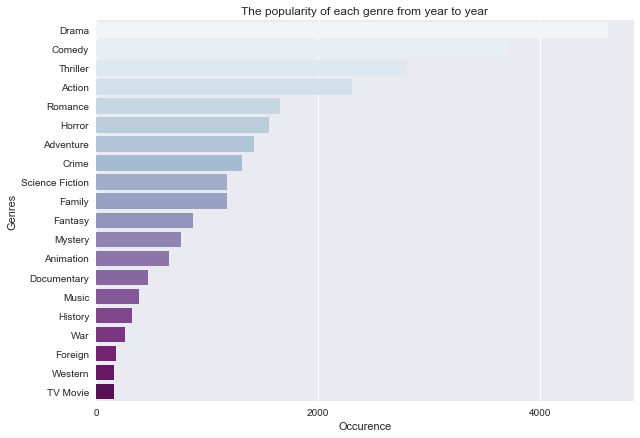

In [49]:
factor_plot(genre_result)

As we can see from the plot above, Drama is the most popular genre over the last 50 years. Comedy is the second most popular genre and thriller is the third most popular genre. 

### Top 20 most active actors and actresses from year to year?

In [50]:
def casts_count():
    cast_new = {}

    casts = movie_modified['cast'].str.split("|")

    cast_new['cast'] = []

    cast_new['cast'] = append(casts)

    d2 = pd.DataFrame(cast_new)

    cast_count = d2['cast'].value_counts()

    cast_final = pd.DataFrame({'cast': cast_count.index, 'count': cast_count.values})

    return cast_final[:20]


In [51]:
cast_result = casts_count()
cast_result

,cast,count
0,Samuel L. Jackson,71
1,Robert De Niro,70
2,Bruce Willis,62
3,Nicolas Cage,61
4,Robin Williams,51
5,John Goodman,48
6,John Cusack,48
7,Morgan Freeman,48
8,Michael Caine,47
9,Susan Sarandon,47


In [52]:
def barplot_casts(data):
    ax=sns.barplot(x='count',y='cast',data=data)
    ax.set(xlabel='Occurence', ylabel='Casts', title = 'Top 20 most active actors and actresses from year to year')

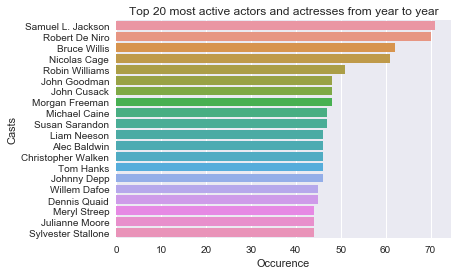

In [53]:
barplot_casts(cast_result)

From the table above, it is obvious that Samuel Jackson is the most active actor who has shot 71 films over the last fifty years. 

### What kinds of properties are associated with movies that have high revenues?

In [73]:
# investigate the relationship between budget and revenue

data = movie_modified[['budget_adj','revenue_adj','popularity','runtime']]

In [74]:
def scatterplot_budget_revenue(data):
    g= sns.jointplot(x='budget_adj', y='revenue_adj', data=data)
    g.fig.suptitle("The relationship between budget and revenue")
    g.set_axis_labels("Budget", "Revenue")


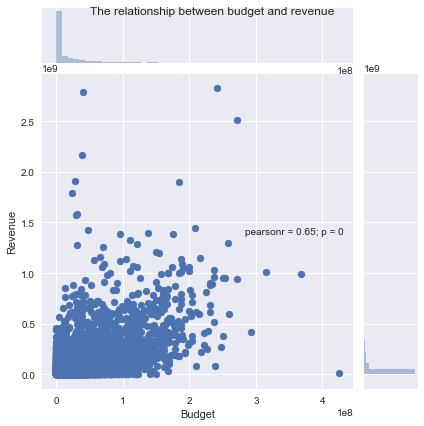

In [75]:
scatterplot_budget_revenue(data)

I first investigated the relationship between budget and revenue. From the plot above, it can be concluded that budget and revenue have postive correlation. 

In [69]:
def scatterplot_popularity_revenue(data):
    g = sns.jointplot(x='popularity', y='revenue_adj', data=data, kind = 'reg')
    g.fig.suptitle("The relationship between popularity and revenue")
    g.set_axis_labels("Popularity", "Revenue")

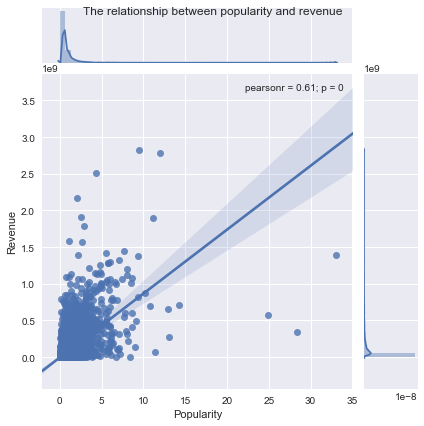

In [70]:
scatterplot_popularity_revenue(data)

Popularity and revenue are positively correlated. However, the correlation between popularity and revenue is weaker than the correlation between budget and revenue. 

In [71]:
def scatterplot_runtime_revenue(data):
    g = sns.jointplot(x='runtime', y='revenue_adj', data=data)
    g.fig.suptitle("The relationship between runtime and revenue")
    g.set_axis_labels("Runtime", "Revenue")

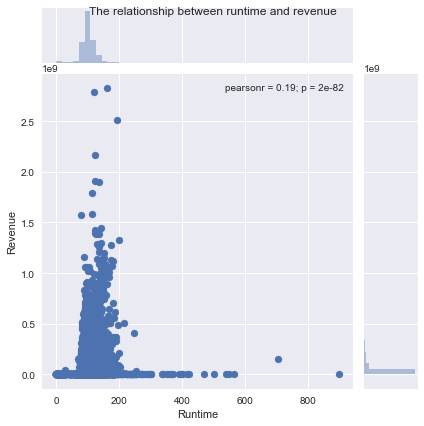

In [72]:
scatterplot_runtime_revenue(data)

Finally, the correlation between runtime and revenue is very weak. So we can conclude that runtime and revenue are not correlated. 

<a id='conclusions'></a>
## Conclusions

I have followed a complete data analysis process to analyze the movie dataset from Kaggle. The purpose of this project is to find the most popular genre, the top 20 most active actors and actresses and the factors associated with high revenues. After the exploratory data analysis step, I can draw the following conlusions based on the findings and results:  
1.From the results shown above, we can conlude that the top five most popular genres are drama,comedy, thriller, action and romance. 

2.The most active actor is Samuel Jackson. Johnny Depp, a very famous actor, ranks the 12th in the top 20 most active actors and actresses. So the top 20 most active actors and actresses plot includes some famous actors and actresses. In addition, top 20 actors and actresses are often over 50 years old. 

3.Since budget and revenue are positively correlated, movies with high budgets tend to earn high revenues. Moreover, popularity and revenue also have a positve correlation which means that popular movies are associated with high revenues. Therefore, properties such as budgets and popularity are related to high revenues. 

4.Runtime and revenue have very weak correlation. So it can be concluded that runtime is not associated with high revenues.

Limitations of my study:

1.The budget and revenue columns contain many zero values. This can influence the correlation results obtained in data analysis step. Those zero values should be handled properly to ensure the accuracy of results. 

2.In the release date column, some data has different date format. Since I did not investigate the release date, I did not clean the release date data. However, this problem should be solved if I want to analyze the release date.

3.In the cast column, there are many cast names contain special characters. If this question can be solved, the result of the second question might be more accurate.  

4.As for handing the missing values, I choosed to drop all the rows that contain null values. In fact, there are many other ways to handle this problem. For example, Replacing the missing values with zeros,interpolated estimates or constants may be better than just dropping the missing values.   

Potential areas to explore:

There are many potential areas for me to explore. For example, I can investigate the relationship between vote average and popularity. Also, I can perform a keyword analysis to analyze the influences that movie keywords has on properties such as revenue and popularity. Furthermore, I can add hypothesis testing to make this project stand out. 

## References

1. Diego Inácio (2017).IMDb Genre based analysis. Retrieved at: https://www.kaggle.com/diegoinacio/imdb-genre-based-analysis